In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import random
%matplotlib inline


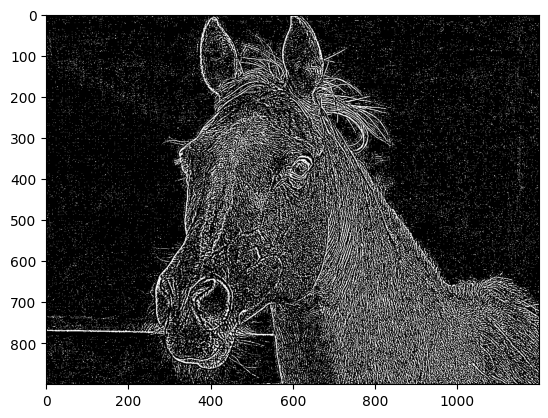

In [14]:
img = cv.imread(r"C:/Users/SURFACEPRO3_/Documents/cvl/Lab6/img3.jpg")
img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur3 = cv.GaussianBlur(img,(3,3),0)
blur1 = cv.GaussianBlur(img,(5,5),0)
LOG = blur3 - blur1
plt.imshow(LOG, cmap ='gray')
plt.show()

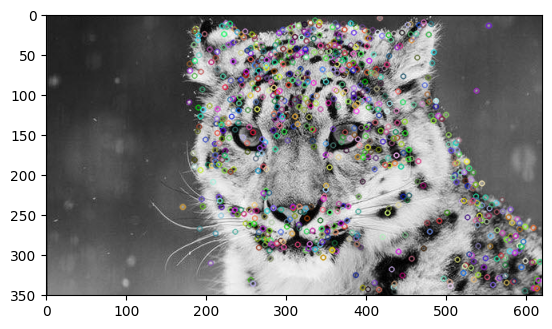

In [82]:
img1 = cv.imread(r"C:/Users/SURFACEPRO3_/Documents/cvl/Lab6/img1.jpg")
gray1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create(1000,3,0.1,0.1,1.6) #nFeatures ,nOctaveLayers, contrastThreshold, edgeThreshold, sigma
img=cv.drawKeypoints(gray1,sift.detect(gray1,None),img1)
plt.imshow(img)
plt.show()

در ورودی تابع ما ابتدا مقدار ویژگی ها را مشخص میکنیم که در واقع تعداد نقاط خروجی برحسب امتیاز تخصیص داده شده به آن ها را مشخص میکند.مقدار دوم تعداد اکتاو های استفاده شده را مشخص میکند اصولا این مقدار را بنا بر رزولوشن تصویر باید تعریف کرد( واریانس از حدی بیشتر باشد در یک رزولوشن خاص دیگر نمیتواند تفاوتی تولید کند) سپس مقدار ترشلد کانترست است که در واقع ترشلد پایه است و نشان میدهد از چه مقدار باید بیشتر باشد تا به عنوان ویژگی در نظر گرفته شود پس هرچه بیشتر شود مقدار ویژگی ها کمتر میشود مقدار بعدی ترشلد لبه است و مشخص میکند باید مقدار ویژگی از چه حدی کمتر باشد(در واقع لبه ها را حذف میکند) تا اینکه به عنوان کی پوینت در نظر گرفته شود پس هرچه بیشتر باشد نقاط بیشتری داریم. و در آخر سیگمای استفاده شده در اولین اکتاو تنظیم میشود 

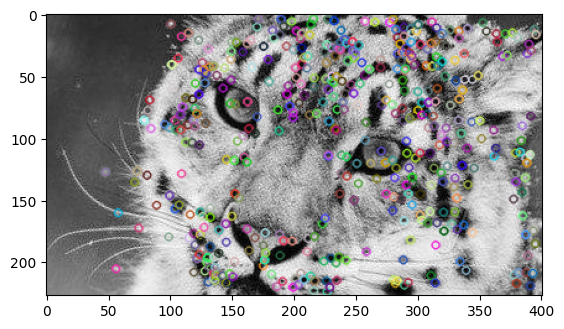

In [86]:
img2 = cv.imread(r"C:/Users/SURFACEPRO3_/Documents/cvl/Lab6/img2.jpg")
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create(1000,3,0.1,0.1,1.6) #nFeatures ,nOctaveLayers, contrastThreshold, edgeThreshold, sigma
img=cv.drawKeypoints(gray2,sift.detect(gray2,None),img2)
plt.imshow(img)
plt.show()

با تقسیم بندی فیلترها و محدود کردن آن ها به یک اکتاو، تنوع فیلترها پایین تر می آید که باعث می شود دقت نقاط کلیدی کمتر شود. همچنین تعداد بیش از 3 4 تا فایده خاصی ندارد
ترشهولد کنتراست ویژگی های ضعیف تر را فیلتر میکند ولی با افزایش بیش از حد آن باعث میشود تمام نقاط کلیدی ها را از دست بدهیم و کاهش بیش از حد آن هم ویژگی های ضعیف تری
را نمایان میکند
ترشهولد لبه ویژگی های لبه مانند را انتخاب میکند
معیار سیگما هم برای اکتاو پایه است


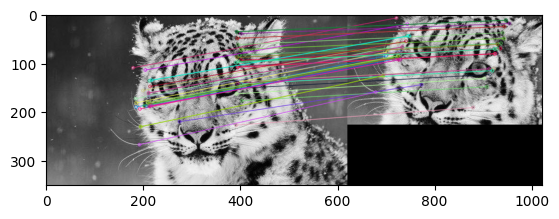

In [87]:
kp_t, des_t = sift.detectAndCompute(gray1, None)
kp_i, des_i = sift.detectAndCompute(gray2, None)

bf = cv.BFMatcher()

good=[]
matches = bf.knnMatch(des_t,des_i,k=2)
for x,y in matches:
    if x.distance < 0.8 * y.distance:
        good.append([x])
img3 = cv.drawMatchesKnn(gray1, kp_t, gray2, kp_i,good[0:49], gray2, flags=2)
plt.imshow(img3)
plt.show()

ر واقع بردار ویژگی ساخته شده به خوبی میتواند نسبت به تغییر اسکیل و روتیشن مقاوم باشد چون با اینکه تصویر هم چرخش داشته است و هم مقداری به نظر تغییر اسکیل داشته است و حتی مکان ها شیفت خورده اند باز بردار ویژگی استخراج شده به صورتی بوده است که نقاط یکسان با هم ست شده اند

C:\Users\SURFACEPRO3_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([ 72., 166.,  61.,  90., 137., 128., 118.,  57.,  66., 105.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

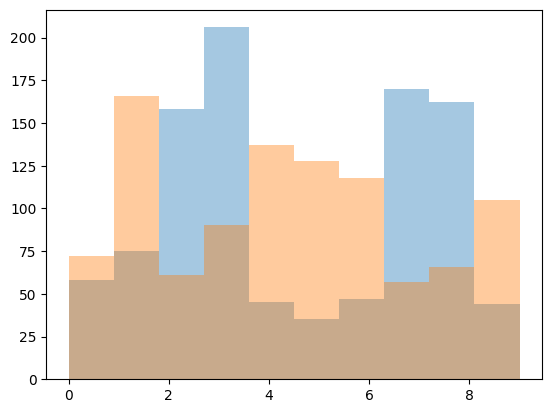

In [88]:
img1 = cv.imread(r"C:/Users/SURFACEPRO3_/Documents/cvl/Lab6/img1.jpg")
gray1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2 = cv.imread(r"C:/Users/SURFACEPRO3_/Documents/cvl/Lab6/img3.jpg")
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create(1000) #nFeatures ,nOctaveLayers, contrastThreshold, edgeThreshold, sigma


kp_t, des_t = sift.detectAndCompute(gray1, None)
kp_i, des_i = sift.detectAndCompute(gray2, None)

dsp_tot = np.vstack([des_t, des_i])
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(dsp_tot)
c1 = kmeans.predict(des_t)
c2 = kmeans.predict(des_i)
plt.hist(c1, bins=10,alpha=0.4)
plt.hist(c2, bins=10,alpha=0.4)

 همانطور که مشاهده میکنید وقتی به 10 کلاس آن ها را تقسیم کرده ایم و تعداد نقاط اینکه هر تصویر چند نقطه در هر کلاس دارد را مشخص میکنیم همانطور که میبینید دو هیستوگرام غیر کلاس اول حدودا متناقض هم هستند یعنی پراکندگی نقاط مربوط به تصویر در هر 10 کلاستر با هم متفاوت است یعنی در کلاستری یا به شدت نقاط مربوط به تصویر یک بیشتر است و یا تصویر دوم که این امر نیز منطقی است
 سپس طبقه بند را (مثلا اس وی ام) میتوانیم به این گونه طراحی کنیم که هیستوگرام های یک سری داده ترین را رسم کند و وقتی داده تست به مدل داده شد آن داده تست را به دسته ای نسبت دهد که مجموع اختلاف هر ستون کمترین باشد. درواقع باید هیستوگرام ها را با هم مقایسه کنیم.